<a href="https://colab.research.google.com/github/Swapnadeepgit/ML_Classification_Algo/blob/main/Spam_Message_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SWAPNADEEP GHOSH  Data Science intern at Oasis Infobyte

TASK NO.4 - We all havebeen the recipient of spam emails before. Spam mail is a type of junk  mail that is sent to a massiven number of users at one time , frequently contianing cryptic messages , scams or most dangerously , phishing content. In this project use python to build an email spam detector. Then use machine learning to train the spam detector to recognise and classify emails into spam and non-spam.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the datasets
data = pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#checking the coloumn list present in the dataframe
data.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#checking the missing vlaues
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#dealing with the missing value
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)



In [ ]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#computing the data text length
data['text_len'] = data['v2'].apply(len)
data.head()

,v1,v2,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


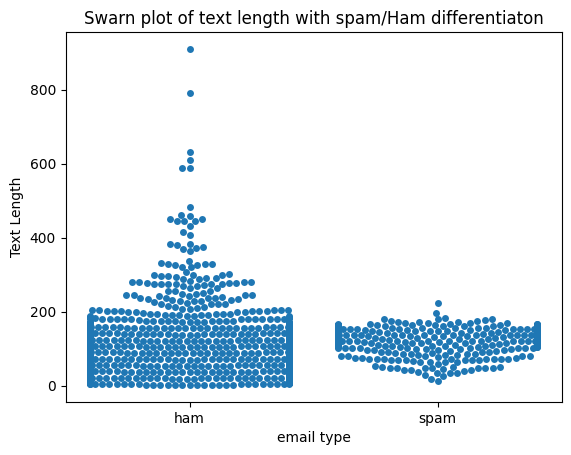

In [ ]:
#visualsing the data - Swarm plots
sns.swarmplot(x='v1',y='text_len',data=data)
plt.xlabel('email type')
plt.ylabel('Text Length')
plt.title('Swarn plot of text length with spam/Ham differentiaton')
plt.show()

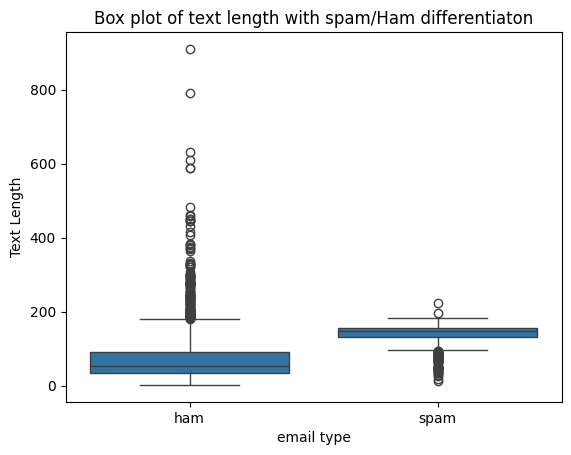

In [ ]:
#visualisation with Box plot
sns.boxplot(x='v1',y='text_len',data=data)
plt.xlabel('email type')
plt.ylabel('Text Length')
plt.title('Box plot of text length with spam/Ham differentiaton')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#dividing the whole dataset into training and testing set for model training
X_train,X_test,y_train,y_test = train_test_split(data['v2'],data['v1'],test_size=0.2,random_state=42)

In [ ]:
#Test preprocessing and feature extraaction
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
#build a naive bias classifier
model = MultinomialNB()
model.fit(X_train_vectorized,y_train)


MultinomialNB()

In [ ]:
#Make a prediction on the test set
y_pred = model.predict(X_test_vectorized)

In [ ]:
#accuracy testing
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",class_report)

Accuracy: 0.9838565022421525
Confusion Matrix:
 [[963   2]
 [ 16 134]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



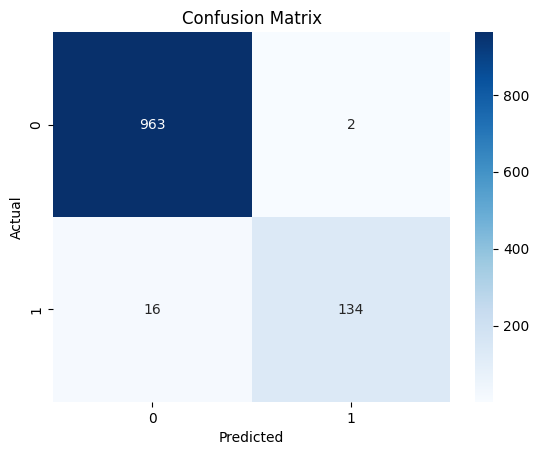

In [ ]:
#visualisation for naive bias
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 Completion of the task ,Thank you.